# Assignment 1 Task 1
## Objective
Implement Insertion, Merge, Heap and Quicksort, record the steps and plot the steps as a function to the input size (n)

In [3]:
import random
input = random.sample(range(100), 10)
print(input)

[57, 7, 26, 35, 60, 5, 36, 93, 28, 67]


### Insertion sort

In [4]:
def insertion_sort(input):
    steps = 0
    for j in range(1, len(input)):
        key = input[j]
        i = j - 1
        steps += 2
        while i >= 0 and input[i] > key:
            input[i + 1] = input[i]
            i = i - 1
            steps += 2
        input[i + 1] = key
        steps += 1
    return input, steps

def insertion_sort_no_step(input):
    for j in range(1, len(input)):
        key = input[j]
        i = j - 1
        while i >= 0 and input[i] > key:
            input[i + 1] = input[i]
            i = i - 1
        input[i + 1] = key
    return input

print(insertion_sort(input.copy()))


([5, 7, 26, 28, 35, 36, 57, 60, 67, 93], 59)


### Merge sort

In [5]:
def merge_sort(input):
    steps = 0
    if len(input) > 1:
        mid = len(input) // 2
        left = input[:mid]
        right = input[mid:]
        steps += 3
        sorted_l, steps_l = merge_sort(left)
        sorted_r, steps_r = merge_sort(right)
        sorted, steps_m = merge(sorted_l, sorted_r)
        steps += steps_l + steps_r + steps_m
        return sorted, steps
    return input, steps

def merge(left, right):
    steps = 0
    merged = []
    left.append(float('inf'))
    right.append(float('inf'))
    i, j = 0, 0
    steps += 4
    for _ in range(len(left) + len(right) - 2):
        if left[i] <= right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j += 1
        steps += 2
    return merged, steps

def merge_sort_no_steps(input):
    if len(input) > 1:
        mid = len(input) // 2
        left = input[:mid]
        right = input[mid:]
        sorted_l = merge_sort_no_steps(left)
        sorted_r = merge_sort_no_steps(right)
        sorted = merge_no_steps(sorted_l, sorted_r)
        return sorted
    return input

def merge_no_steps(left, right):
    merged = []
    left.append(float('inf'))
    right.append(float('inf'))
    i, j = 0, 0
    for _ in range(len(left) + len(right) - 2):
        if left[i] <= right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j += 1
    return merged


print(merge_sort(input.copy()))


([5, 7, 26, 28, 35, 36, 57, 60, 67, 93], 131)


### Heap sort

In [6]:
def heap_sort(array):
    steps = 0
    array, steps_b = build_max_heap(array)
    steps += steps_b
    for i in range(len(array), 1, -1):
        array[0], array[i-1] = array[i-1], array[0]
        end = array[i-1:]
        array, steps_h = heapify(array[:i-1], 1)
        array = array + end
        steps += steps_h + 1
    return array, steps

def build_max_heap(array):
    steps = 0
    for i in range(len(array)//2, 0, -1):
        array, steps_h = heapify(array, i)
        steps += steps_h
    return array, steps

def heapify(array, i):
    steps = 0
    left = 2*i
    right = 2*i + 1
    largest = i
    if left <= len(array) and array[left-1] > array[i-1]:
        largest = left
        steps += 1
    if right <= len(array) and array[right-1] > array[largest-1]:
        largest = right
        steps += 1
    if largest != i:
        array[i-1], array[largest-1] = array[largest-1], array[i-1]
        array, steps_h = heapify(array, largest)
        steps += steps_h + 1
    return array, steps

print(heap_sort(input.copy()))

([5, 7, 26, 28, 35, 36, 57, 60, 67, 93], 55)


### Quick sort

In [7]:
def quick_sort(array):
    steps = 0
    if len(array) <= 1:
        return array, 1
    
    array = median_of_three(array)
    pivot = array[-1]

    left = []
    right = []
    steps += 3  + 4 # median_of_three has 4 steps

    for i in range(len(array)-1):
        if array[i] <= pivot:
            left.append(array[i])
        else:
            right.append(array[i])
        steps += 1
    steps_l, steps_r = 0, 0
    if len(left) > 1:
        left, steps_l = quick_sort(left)
    if len(right) > 1:
        right, steps_r = quick_sort(right)
    
    array = left + [pivot] + right
    steps += steps_l + steps_r + 1

    return array, steps

def median_of_three(array):
    pivot = len(array) // 2
    pivot = 0 if array[0] < array[pivot] else pivot
    pivot = len(array) - 1 if array[len(array) - 1] < array[pivot] else pivot

    array[-1], array[pivot] = array[pivot], array[-1]
    return array

print(quick_sort(input.copy()))

([5, 7, 26, 28, 35, 36, 57, 60, 67, 93], 83)


### Counting and Plotting

13 / 13


Text(0, 0.5, 'c factor')

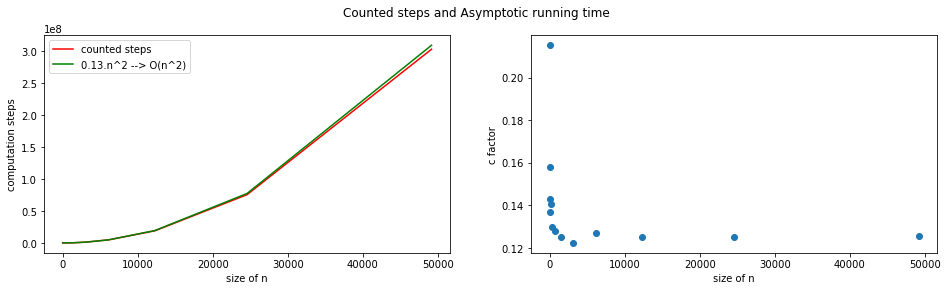

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [16,4]
#mpl.rcParams.update({'font.size': 12})

from IPython.display import clear_output
fig, ax = plt.subplots(1, 2)
fig.suptitle('Counted steps and Asymptotic running time')


B=random.sample(range(6), 6)
points=13 # plotting points
x=[]
y=[]
ref=[]
c=[]

for i in range(0,points):
    clear_output(wait=True)
    print(i+1,"/", points)
    _, steps=insertion_sort(B) 
    # double the size of the list to sort
    B=random.sample(range(len(B)*2), len(B)*2)
    x.append(len(B))
    y.append(steps)    
    c.append(steps/len(B)**2)# quick and dirty estimation of c--> T(sort)=c.N^2
    
for v in x:
    ref.append([v**2 *c[6]])
ax[0].plot(x,y, color="red", label="counted steps")
ax[0].plot(x,ref, color="green", label= str(round(c[6],2)) + ".n^2 --> O(n^2)")
ax[0].set_xlabel("size of n")
ax[0].set_ylabel("computation steps")
ax[0].legend()

ax[1].scatter(x,c, label= "approximation of c" )
ax[1].set_xlabel("size of n")
ax[1].set_ylabel("c factor")
    

13 / 13


Text(0, 0.5, 'c factor')

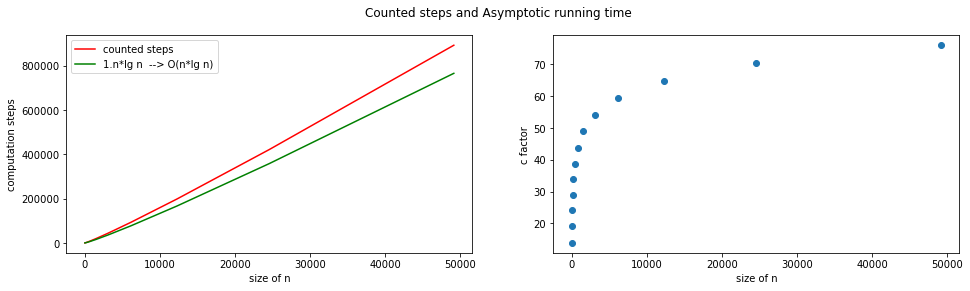

In [13]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
mpl.rcParams['figure.figsize'] = [16,4]
#mpl.rcParams.update({'font.size': 12})

from IPython.display import clear_output
fig, ax = plt.subplots(1, 2)
fig.suptitle('Counted steps and Asymptotic running time')


B=random.sample(range(6), 6)
points=13 # plotting points
x=[]
y=[]
ref=[]
c=[]

for i in range(0,points):
    clear_output(wait=True)
    print(i+1,"/", points)
    _, steps=merge_sort(B) 
    # double the size of the list to sort
    B=random.sample(range(len(B)*2), len(B)*2)
    x.append(len(B))
    y.append(steps)    
    c.append(steps/len(B) * math.log2(steps/len(B)))# quick and dirty estimation of c--> T(sort)=c.N^2
    
for v in x:
    ref.append([v * math.log2(v) *1])
ax[0].plot(x,y, color="red", label="counted steps")
ax[0].plot(x,ref, color="green", label= "1.n*lg n  --> O(n*lg n)")
ax[0].set_xlabel("size of n")
ax[0].set_ylabel("computation steps")
ax[0].legend()

ax[1].scatter(x,c, label= "approximation of c" )
ax[1].set_xlabel("size of n")
ax[1].set_ylabel("c factor")
    

13 / 13


Text(0, 0.5, 'c factor')

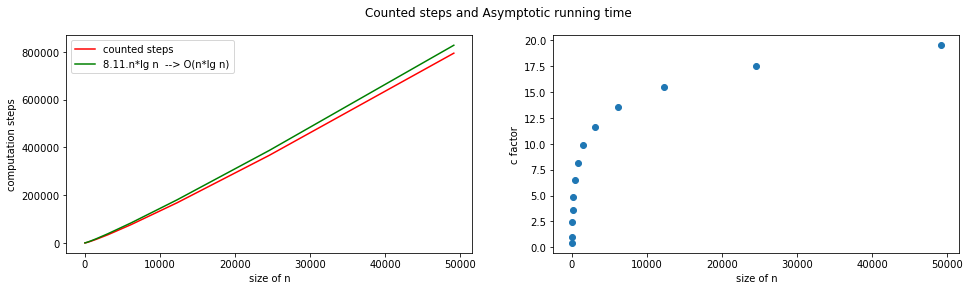

In [14]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
mpl.rcParams['figure.figsize'] = [16,4]
#mpl.rcParams.update({'font.size': 12})

from IPython.display import clear_output
fig, ax = plt.subplots(1, 2)
fig.suptitle('Counted steps and Asymptotic running time')


B=random.sample(range(6), 6)
points=13 # plotting points
x=[]
y=[]
ref=[]
c=[]

for i in range(0,points):
    clear_output(wait=True)
    print(i+1,"/", points)
    _, steps=heap_sort(B) 
    # double the size of the list to sort
    B=random.sample(range(len(B)*2), len(B)*2)
    x.append(len(B))
    y.append(steps)    
    c.append(steps/len(B) * math.log10(steps/len(B)))# quick and dirty estimation of c--> T(sort)=c.N^2
    
for v in x:
    ref.append([v * math.log10(v) *c[3]])
ax[0].plot(x,y, color="red", label="counted steps")
ax[0].plot(x,ref, color="green", label= str(round(c[6],2)) + ".n*lg n  --> O(n*lg n)")
ax[0].set_xlabel("size of n")
ax[0].set_ylabel("computation steps")
ax[0].legend()

ax[1].scatter(x,c, label= "approximation of c" )
ax[1].set_xlabel("size of n")
ax[1].set_ylabel("c factor")

13 / 13


Text(0, 0.5, 'c factor')

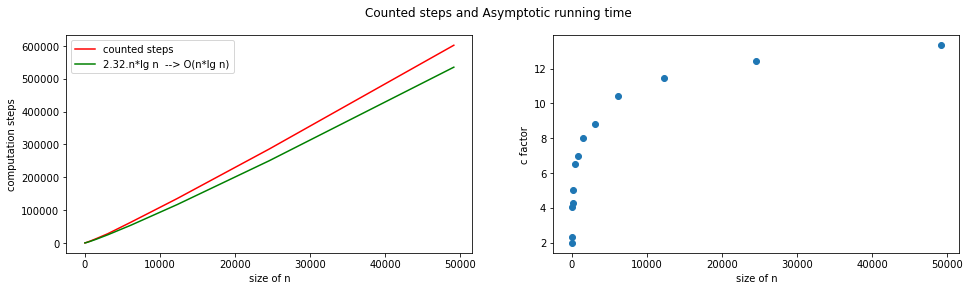

In [15]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
mpl.rcParams['figure.figsize'] = [16,4]
#mpl.rcParams.update({'font.size': 12})

from IPython.display import clear_output
fig, ax = plt.subplots(1, 2)
fig.suptitle('Counted steps and Asymptotic running time')


B=random.sample(range(6), 6)
points=13 # plotting points
x=[]
y=[]
ref=[]
c=[]

for i in range(0,points):
    clear_output(wait=True)
    print(i+1,"/", points)
    _, steps=quick_sort(B) 
    # double the size of the list to sort
    B=random.sample(range(len(B)*2), len(B)*2)
    x.append(len(B))
    y.append(steps)    
    c.append(steps/len(B) * math.log10(steps/len(B)))# quick and dirty estimation of c--> T(sort)=c.N^2
    
for v in x:
    ref.append([v * math.log10(v) *c[1]])
ax[0].plot(x,y, color="red", label="counted steps")
ax[0].plot(x,ref, color="green", label= str(round(c[1],2)) + ".n*lg n  --> O(n*lg n)")
ax[0].set_xlabel("size of n")
ax[0].set_ylabel("computation steps")
ax[0].legend()

ax[1].scatter(x,c, label= "approximation of c" )
ax[1].set_xlabel("size of n")
ax[1].set_ylabel("c factor")

### Timing

13 / 13


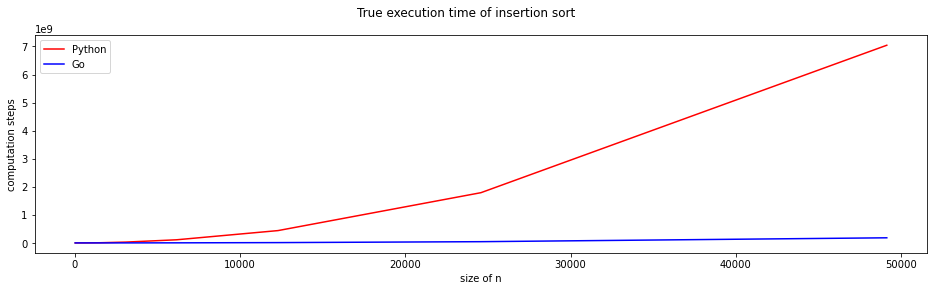

In [16]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
import random
mpl.rcParams['figure.figsize'] = [16,4]
#mpl.rcParams.update({'font.size': 12})

from IPython.display import clear_output
fig, ax = plt.subplots(1, 1)
fig.suptitle('True execution time of insertion sort')


B=random.sample(range(6), 6)
points=13 # plotting points
x=[]
y=[]

for i in range(0,points):
    clear_output(wait=True)
    print(i+1,"/", points)
    start = time.time_ns()
    _=insertion_sort_no_step(B) 
    end = time.time_ns()
    # double the size of the list to sort
    B=random.sample(range(len(B)*2), len(B)*2)
    x.append(len(B))
    y.append(end-start)

with open("result_insertion.txt", "r") as f:
    x_go = []
    y_go = []
    for line in f:
        x_go.append(int(line.split()[0]))
        y_go.append(int(line.split()[1]))
    
ax.plot(x,y, color="red", label="Python")
ax.plot(x_go,y_go, color="blue", label="Go")
ax.set_xlabel("size of n")
ax.set_ylabel("Time in ns")
ax.legend()


13 / 13


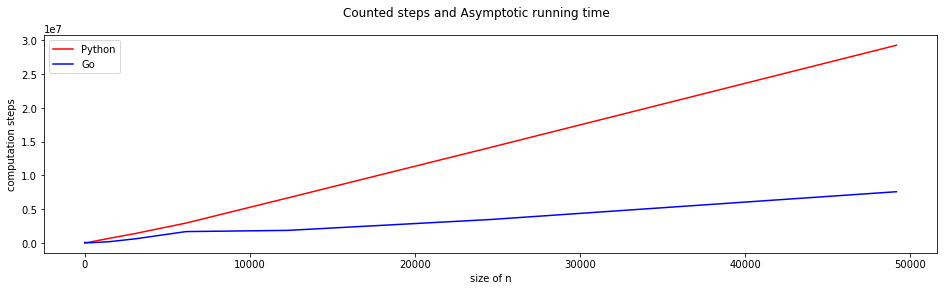

In [12]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import time
import random
mpl.rcParams['figure.figsize'] = [16,4]
#mpl.rcParams.update({'font.size': 12})

from IPython.display import clear_output
fig, ax = plt.subplots(1, 1)
fig.suptitle('True execution time of merge sort')


B=random.sample(range(6), 6)
points=13 # plotting points
x=[]
y=[]

for i in range(0,points):
    clear_output(wait=True)
    print(i+1,"/", points)
    start = time.time_ns()
    _=merge_sort_no_steps(B) 
    end = time.time_ns()
    # double the size of the list to sort
    B=random.sample(range(len(B)*2), len(B)*2)
    x.append(len(B))
    y.append(end-start)

with open("result_merge.txt", "r") as f:
    x_go = []
    y_go = []
    for line in f:
        x_go.append(int(line.split()[0]))
        y_go.append(int(line.split()[1]))
    
ax.plot(x,y, color="red", label="Python")
ax.plot(x_go,y_go, color="blue", label="Go")
ax.set_xlabel("size of n")
ax.set_ylabel("Time in ns")
ax.legend()
